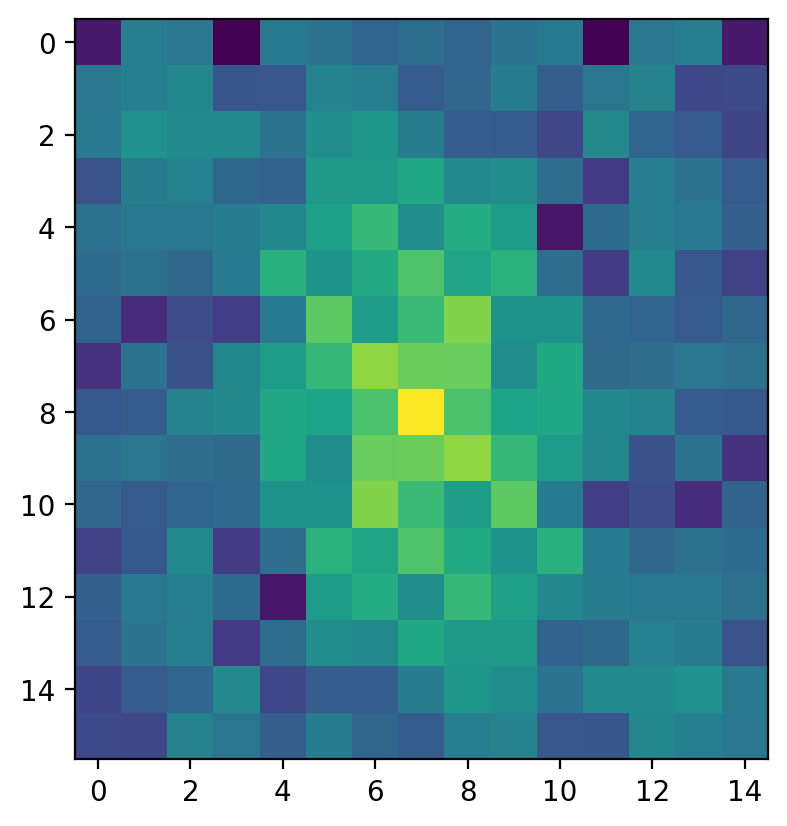

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
from torch import nn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from dataloader import FFT_transform_ST
from time import time
import os

In [2]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]

    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [3]:
#I'm using the dataloading code that you uploaded
entries = os.listdir('Data/')
#print(entries)
train_data=[k for k in entries if 'train' in k]
#print(train_data)

X_title_train=[]
X_data_train = []


for entry in train_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
    
            #here we apply the FFT transform
            X_data_train.append(np.array(FFT_transform_ST(mat_r)))

            X_title_train.append(int(res))

X_data_train = np.array(X_data_train)  
  
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#create nested lists for storing reasons
X_title_test=[]
X_data_test = []



for entry in test_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))   

            X_data_test.append(np.array(FFT_transform_ST(mat_r)))
 
            X_title_test.append(int(res))
   
   
X_data_test = np.array( X_data_test)

X_train_lable = X_title_train
X_test_lable = X_title_test
x_train = X_data_train
x_train = x_train.reshape(1000,-1)
y_train = np.array(X_title_train)

x_test= X_data_test
x_test = x_test.reshape(1000,-1)
y_test= np.array(X_title_test)

In [4]:
# Layer details for the neural network
input_size = 480
hidden_sizes = [512,256]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)     

Sequential(
  (0): Linear(in_features=480, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [5]:
criterion = nn.NLLLoss()
# images, labels = next(iter(trainloader))
# images = images.view(images.shape[0], -1)
batch_size = 100
batch_x, batch_y = x_train, y_train
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

logps = model(batch_x_tensor)
loss = criterion(logps, batch_y_tensor)

In [6]:
print(batch_y_tensor)

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [7]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-4.0739e-03, -4.8429e-03, -5.4314e-03,  ...,  1.0548e-04,
          4.3410e-05,  1.0816e-05],
        [ 5.2704e-02,  5.2509e-02,  5.7748e-02,  ..., -1.3189e-03,
         -2.9700e-04,  1.3341e-04],
        [ 3.1837e-02,  3.2980e-02,  4.1455e-02,  ...,  7.4956e-04,
         -4.1247e-04,  3.8878e-04],
        ...,
        [ 1.7087e-02,  1.7720e-02,  2.3494e-02,  ...,  8.6090e-04,
         -7.8373e-05, -2.8323e-05],
        [-2.1537e-03, -2.9744e-03, -3.1741e-03,  ...,  2.6737e-04,
          2.7539e-04,  5.6693e-05],
        [-7.7728e-04, -1.8837e-03, -1.4913e-03,  ..., -6.2761e-04,
          1.5142e-04, -7.0603e-04]])


In [8]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [9]:
print('Initial weights - ', model[0].weight)

# images, labels = next(iter(trainloader))
# images.resize_(64, 784)
batch_x, batch_y =  x_train, y_train
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(batch_x_tensor)
loss = criterion(output, batch_y_tensor)
loss.backward()
print('Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[-0.0249,  0.0189,  0.0123,  ..., -0.0412,  0.0383,  0.0179],
        [ 0.0411,  0.0365, -0.0018,  ...,  0.0296, -0.0271,  0.0179],
        [-0.0291,  0.0204,  0.0179,  ...,  0.0358,  0.0135,  0.0068],
        ...,
        [-0.0203,  0.0315, -0.0133,  ...,  0.0137, -0.0109,  0.0052],
        [ 0.0117, -0.0387, -0.0320,  ..., -0.0178, -0.0288, -0.0370],
        [ 0.0350, -0.0433, -0.0371,  ..., -0.0197,  0.0257, -0.0446]],
       requires_grad=True)
Gradient - tensor([[-4.0739e-03, -4.8429e-03, -5.4314e-03,  ...,  1.0548e-04,
          4.3410e-05,  1.0816e-05],
        [ 5.2704e-02,  5.2509e-02,  5.7748e-02,  ..., -1.3189e-03,
         -2.9700e-04,  1.3341e-04],
        [ 3.1837e-02,  3.2980e-02,  4.1455e-02,  ...,  7.4956e-04,
         -4.1247e-04,  3.8878e-04],
        ...,
        [ 1.7087e-02,  1.7720e-02,  2.3494e-02,  ...,  8.6090e-04,
         -7.8373e-05, -2.8323e-05],
        [-2.1537e-03, -2.9744e-03, -3.1741e-03,  ...,  2.6737e

In [10]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0248,  0.0190,  0.0124,  ..., -0.0412,  0.0383,  0.0179],
        [ 0.0406,  0.0359, -0.0024,  ...,  0.0296, -0.0271,  0.0179],
        [-0.0295,  0.0201,  0.0175,  ...,  0.0358,  0.0135,  0.0068],
        ...,
        [-0.0204,  0.0313, -0.0135,  ...,  0.0137, -0.0109,  0.0052],
        [ 0.0118, -0.0387, -0.0320,  ..., -0.0178, -0.0288, -0.0370],
        [ 0.0351, -0.0433, -0.0370,  ..., -0.0197,  0.0257, -0.0446]],
       requires_grad=True)


In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 60
training_loss=[]
for e in range(epochs):
    running_loss = 0
#     for images, labels in trainloader:
#         # Flatten MNIST images into a 784 long vector
#         images = images.view(images.shape[0], -1)
    
    batch_x, batch_y =  x_train, y_train
    batch_x_tensor = torch.from_numpy(batch_x)
    batch_x_tensor = batch_x_tensor.to(torch.float32)

    batch_y_tensor = torch.from_numpy(batch_y)
    batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

    # Training pass
    optimizer.zero_grad()

    output = model(batch_x_tensor)
    loss = criterion(output, batch_y_tensor)

    #This is where the model learns by backpropagating
    loss.backward()

    #And optimizes its weights here
    optimizer.step()

    running_loss += loss.item()
    training_loss.append( running_loss/len(batch_x_tensor))
#     else:
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(batch_x_tensor)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.06330784225463867
Epoch 1 - Training loss: 0.0854450912475586
Epoch 2 - Training loss: 0.04795938110351562
Epoch 3 - Training loss: 0.00801685905456543
Epoch 4 - Training loss: 0.004136416912078857
Epoch 5 - Training loss: 0.0036433067321777345
Epoch 6 - Training loss: 0.0035161399841308594
Epoch 7 - Training loss: 0.0034793179035186765
Epoch 8 - Training loss: 0.0025149593353271486
Epoch 9 - Training loss: 0.002438021183013916
Epoch 10 - Training loss: 0.0021929569244384765
Epoch 11 - Training loss: 0.002034313440322876
Epoch 12 - Training loss: 0.0022028541564941407
Epoch 13 - Training loss: 0.002048825263977051
Epoch 14 - Training loss: 0.0017900406122207642
Epoch 15 - Training loss: 0.0018111687898635864
Epoch 16 - Training loss: 0.003141540288925171
Epoch 17 - Training loss: 0.0020944833755493163
Epoch 18 - Training loss: 0.00202566123008728
Epoch 19 - Training loss: 0.0020448946952819824
Epoch 20 - Training loss: 0.0019172263145446778
Epoch 21 - Trainin

In [12]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 16, 15).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [13]:
"""batch_x, batch_y = next_batch(batch_size, x_test, y_test)
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# img = images[0].view(1, 784)
img = batch_x_tensor[0].view(1,240)
label = batch_y[0]
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Actual label =", label)
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 16, 15), ps)"""

'batch_x, batch_y = next_batch(batch_size, x_test, y_test)\nbatch_x_tensor = torch.from_numpy(batch_x)\nbatch_x_tensor = batch_x_tensor.to(torch.float32)\n\nbatch_y_tensor = torch.from_numpy(batch_y)\nbatch_y_tensor = batch_y_tensor.type(torch.LongTensor)\n\n# img = images[0].view(1, 784)\nimg = batch_x_tensor[0].view(1,240)\nlabel = batch_y[0]\n# Turn off gradients to speed up this part\nwith torch.no_grad():\n    logps = model(img)\n\n# Output of the network are log-probabilities, need to take exponential for probabilities\nps = torch.exp(logps)\nprobab = list(ps.numpy()[0])\nprint("Actual label =", label)\nprint("Predicted Digit =", probab.index(max(probab)))\nview_classify(img.view(1, 16, 15), ps)'

In [24]:
testing_loss = []

batch_x, batch_y =  x_test, y_test
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(batch_x_tensor)
    loss = criterion(logps, batch_y_tensor)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy())


output = model(batch_x_tensor)
loss = criterion(output, batch_y_tensor)

    #This is where the model learns by backpropagating
#     loss.backward()

#     #And optimizes its weights here
#     optimizer.step()

running_loss += loss.item()
testing_loss.append(running_loss/len(batch_x_tensor))
#     else:
print("Epoch {} - Testing loss: {}".format(e, running_loss/len(batch_x_tensor)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch range(0, 60) - Testing loss: 0.0009646015167236328

Training Time (in minutes) = 9.00771884918213


In [14]:
probability_arr = []
for i in range(len(probab)):
    temp_arr = list(probab[i])
    probability_arr.append(temp_arr.index(max(temp_arr)))
# probab.index(max(probab))

In [15]:
probability_arr

[8,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 3,
 8,
 8,
 8,
 8,
 8,
 8,
 3,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 0,
 8,
 8,
 8,
 9,
 8,
 8,
 8,
 2,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 0,
 8,
 8,
 8,
 8,
 8,
 0,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 6,
 9,
 9,
 5,
 6,
 9,
 6,
 6,
 9,
 6,
 6,
 6,
 9,
 6,
 6,
 6,
 6,
 2,
 6,
 9,
 6,
 6,
 9,
 9,
 6,
 9,
 9,
 6,
 6,
 6,
 6,
 9,
 6,
 9,
 5,
 9,
 9,
 9,
 6,
 6,
 9,
 6,
 6,
 6,
 6,
 6,
 9,
 6,
 9,
 6,
 9,
 6,
 1,
 9,
 9,
 6,
 9,
 6,
 2,
 6,
 9,
 9,
 6,
 9,
 6,
 6,
 6,
 9,
 5,
 9,
 6,
 6,
 6,
 6,
 9,
 6,
 6,
 9,
 5,
 9,
 9,
 6,
 4,
 9,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 6,
 9,
 4,
 6,
 6,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 3,
 2,
 2,
 2,
 2,


In [16]:
len(probability_arr)

1000

In [17]:
batch_y_tensor

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [18]:
len(batch_y_tensor)

1000

In [19]:
acc = sum(1 for x,y in zip(probability_arr,batch_y_tensor) if x == y) / len(probability_arr)
acc= acc*100
print("Accuracy = ", acc,"%")

Accuracy =  77.9 %


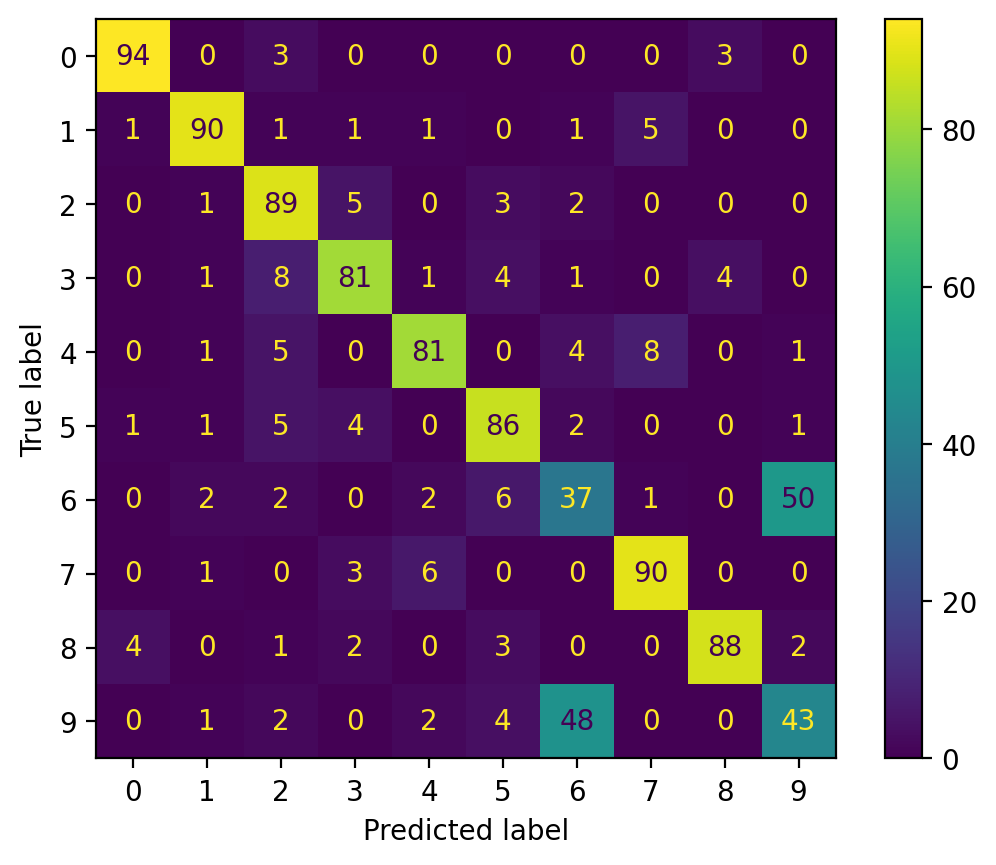

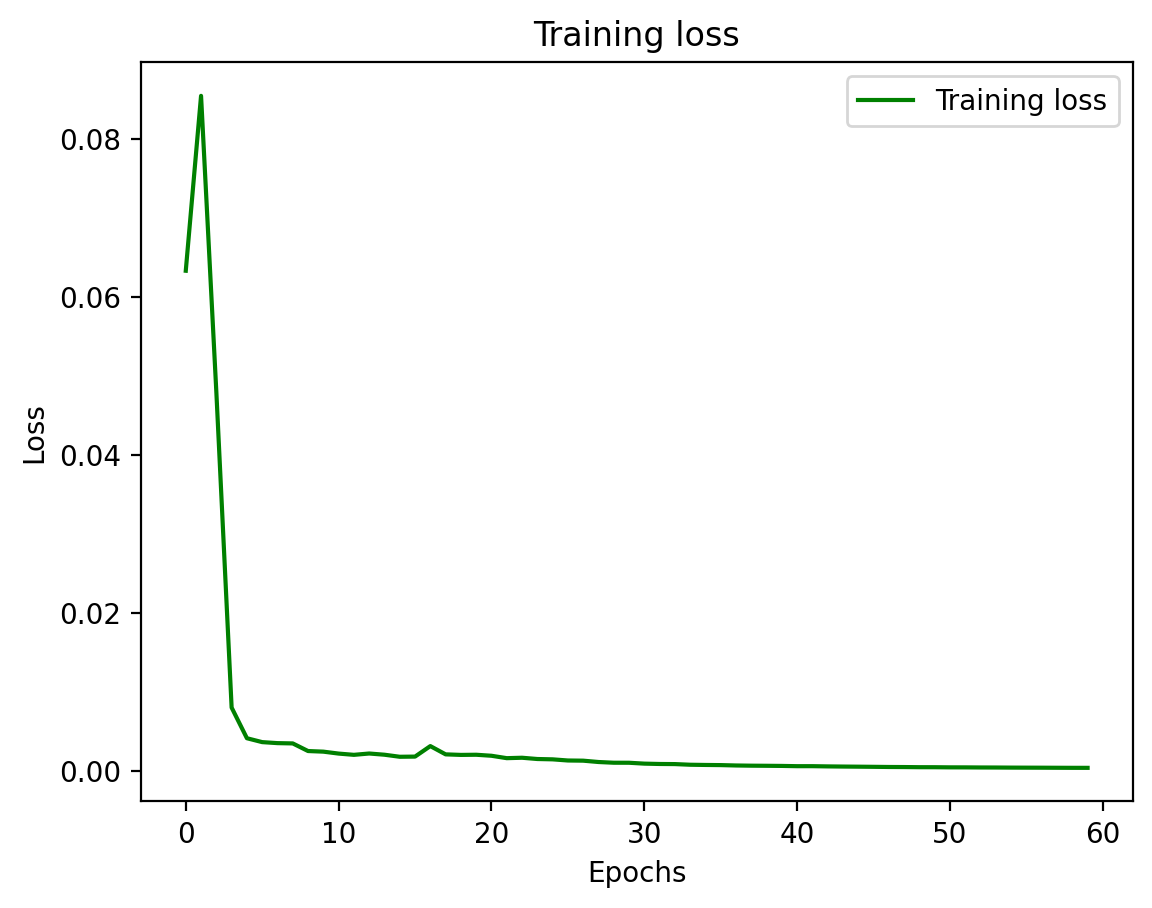

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = batch_y_tensor
y_pred = probability_arr

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

e = range(0, epochs)


plt.plot(e, training_loss, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





In [26]:
# batch_x, batch_y = next_batch(batch_size, x_test_raw, y_test)
batch_x, batch_y =  x_test, y_test
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(batch_y)
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# img = images[0].view(1, 784)
img = batch_x_tensor[0].view(1,240)
label = batch_y[0]
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Actual label =", label)
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 16, 15), ps)

RuntimeError: shape '[1, 240]' is invalid for input of size 480

In [25]:
testing_loss

[0.0009646015167236328]